In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
train_dir = '/content/drive/MyDrive/animals/Train'
test_dir = '/content/drive/MyDrive/animals/Test'

Setting parameters

In [ ]:
num_classes = 90
image_size = (299,299)
batch_size = 32
learning_rate = 0.001
epochs = 5

Preprocessing and augument the training data  

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True,

)

Preprocess the validation data

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

Load the inceptionV3 model

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False ,input_shape=(image_size[0], image_size[1],3) )

87910968/87910968 [==============================] - 1s 0us/step


add the top layer

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

combine base model with top layer

In [ ]:
model = Model(inputs = base_model.input , outputs= predictions)

freez the layers in base model

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

compile the model

In [ ]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

generate training and validation data from dir

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_dir = test_dir

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 4321 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


train the model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // batch_size,
    epochs = epochs,
    validation_data = valid_generator,
    validation_steps = valid_generator.n // batch_size,
)

Epoch 1/5
135/135 [==============================] - 2214s 16s/step - loss: 1.5780 - accuracy: 0.6794 - val_loss: 0.6868 - val_accuracy: 0.7983
Epoch 2/5
135/135 [==============================] - 1512s 11s/step - loss: 0.4104 - accuracy: 0.8774 - val_loss: 0.5369 - val_accuracy: 0.8456
Epoch 3/5
135/135 [==============================] - 1491s 11s/step - loss: 0.2906 - accuracy: 0.9137 - val_loss: 0.4605 - val_accuracy: 0.8769
Epoch 4/5
135/135 [==============================] - 1534s 11s/step - loss: 0.2001 - accuracy: 0.9398 - val_loss: 0.4500 - val_accuracy: 0.8807
Epoch 5/5
135/135 [==============================] - 1487s 11s/step - loss: 0.1460 - accuracy: 0.9559 - val_loss: 0.5110 - val_accuracy: 0.8693


save the model

In [ ]:
model.save('/content/drive/MyDrive/inceptionv3_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


test the model

Saving téléchargement.jpg to téléchargement.jpg
1/1 [==============================] - 7s 7s/step


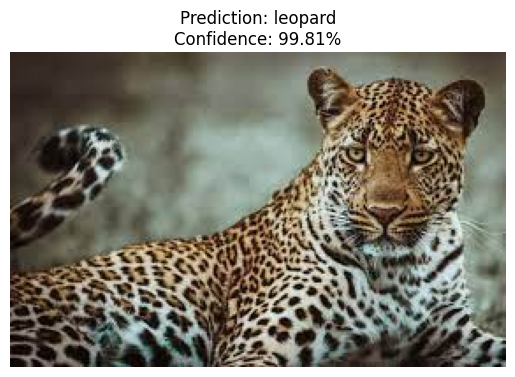

In [ ]:
import PIL.Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('/content/drive/MyDrive/inceptionv3_model.h5')


class_labels = ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


def preprocess_image(image_path):
    img = PIL.Image.open(image_path)
    img = img.resize((299, 299))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img


def predict_animal(image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_label, confidence


from google.colab import files
uploaded = files.upload()


uploaded_file_path = list(uploaded.keys())[0]


prediction, confidence = predict_animal(uploaded_file_path)


img = PIL.Image.open(uploaded_file_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {prediction}\nConfidence: {confidence:.2%}')
plt.show()